# Short-Term Stock Price Prediction using Machine Learning

This project predicts the next day's closing stock price using historical market data.
We use Open, High, Low, and Volume as features and train a regression model to estimate the next Close price.

**Stock Selected:** Apple Inc.  
**Model Used:** Linear Regression  
**Data Source:** Yahoo Finance (via yfinance API)


## Problem Statement

Stock markets generate large volumes of time-series data every day.
The goal of this project is to:

- Fetch historical stock data
- Engineer features for prediction
- Train a regression model
- Predict the next day’s closing price
- Compare predicted vs actual prices visually

This is a **short-term regression problem**, not long-term forecasting.


In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 2.0 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.9 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 1.7 MB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 1.8 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 1.8 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 1.8 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 1.8

## Import Required Libraries

We import:
- Data handling libraries
- Visualization tools
- Machine learning utilities
- Yahoo Finance API wrapper


In [2]:

import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


## Fetching Historical Stock Data

We use the yfinance library to retrieve historical stock data directly from Yahoo Finance.

The dataset includes:
- Open
- High
- Low
- Close
- Volume

We download data for the selected stock over multiple years to ensure sufficient training samples.


In [3]:
# Select stock ticker
ticker = "AAPL"

# Download last 5 years of data
data = yf.download(ticker, period="5y")

# Display first few rows
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-12-28,133.061203,133.693941,129.965617,130.432885,124486200
2020-12-29,131.289505,135.105436,130.773576,134.385091,121047300
2020-12-30,130.170059,132.379800,129.858547,131.980681,96452100
2020-12-31,129.167404,131.162985,128.223154,130.520502,99116600
2021-01-04,125.974442,130.062937,123.394792,129.975330,143301900


## Exploratory Data Analysis (EDA)

Before training the model, we:
- Inspect the dataset structure
- Check for missing values
- Understand feature distributions

This step ensures the data is clean and suitable for modeling.


In [4]:
# Select relevant features
data = data[['Open', 'High', 'Low', 'Volume', 'Close']]

# Drop missing values
data.dropna(inplace=True)

data.head()

Price,Open,High,Low,Volume,Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-12-28,130.432885,133.693941,129.965617,124486200,133.061203
2020-12-29,134.385091,135.105436,130.773576,121047300,131.289505
2020-12-30,131.980681,132.379800,129.858547,96452100,130.170059
2020-12-31,130.520502,131.162985,128.223154,99116600,129.167404
2021-01-04,129.975330,130.062937,123.394792,143301900,125.974442


## Feature Engineering

To predict the next day’s Close price, we:

- Use today's Open, High, Low, and Volume as input features
- Shift the Close price by **-1 day** to create the target variable

This transforms the time-series data into a supervised learning problem.


In [5]:
# Shift Close price upward to predict next day's Close
data['Target_Close'] = data['Close'].shift(-1)
# Drop last row (it has no future value)
data.dropna(inplace=True)

data.head()


Price,Open,High,Low,Volume,Close,Target_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-12-28,130.432885,133.693941,129.965617,124486200,133.061203,131.289505
2020-12-29,134.385091,135.105436,130.773576,121047300,131.289505,130.170059
2020-12-30,131.980681,132.379800,129.858547,96452100,130.170059,129.167404
2020-12-31,130.520502,131.162985,128.223154,99116600,129.167404,125.974442
2021-01-04,129.975330,130.062937,123.394792,143301900,125.974442,127.531967


## Train-Test Split

The dataset is split into:
- **Training set** – used to learn patterns
- **Testing set** – used to evaluate performance

We avoid shuffling because stock data is **time-dependent**.


In [6]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target_Close']

print(X.shape, y.shape)


(1254, 4) (1254,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


## Model Training

We train a **Linear Regression** model to learn the relationship between market features and the closing price.

Linear Regression is chosen because:
- It is interpretable
- It provides a strong baseline
- It works well for short-term numeric prediction


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = model.predict(X_test)

y_pred[:5]

array([253.44488139, 256.7203445 , 258.40772446, 253.42949493,
       251.1159096 ])

## Model Evaluation

We evaluate the model using:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R² Score

These metrics help quantify prediction accuracy.


In [10]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 3.122228699036585
Root Mean Squared Error: 4.546677448378566


## Actual vs Predicted Closing Prices

We visualize:
- Actual closing prices
- Model-predicted closing prices

This comparison helps identify trends, errors, and overall model performance.


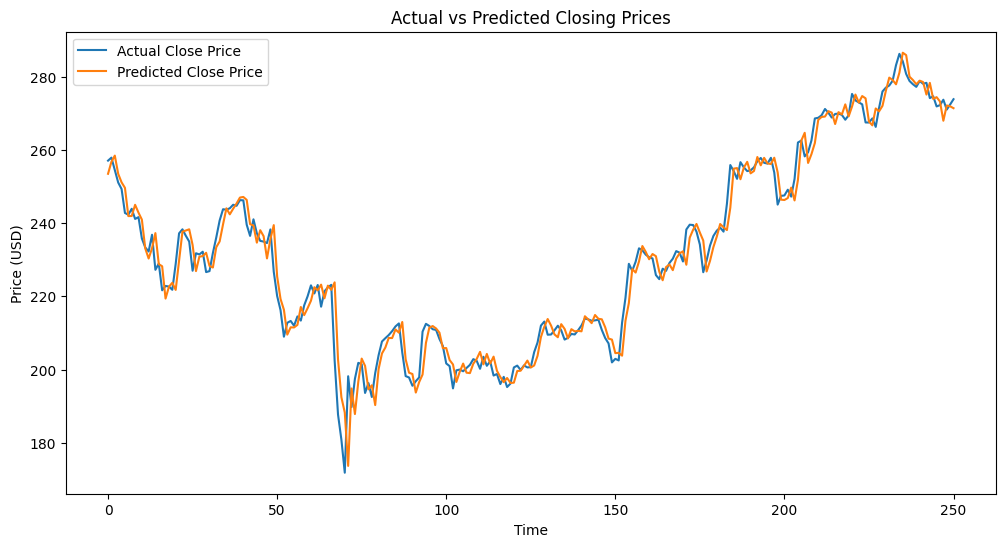

In [11]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")

plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## Predicting the Next Day’s Closing Price

Finally, we use the most recent available market data to predict the **next trading day's closing price**.

This simulates a real-world short-term prediction scenario.


In [12]:
# Take last available data
latest_data = X.iloc[-1].values.reshape(1, -1)

next_day_prediction = model.predict(latest_data)

print("Predicted Next Day Closing Price:", next_day_prediction[0])

Predicted Next Day Closing Price: 271.3565892294604


## Final Insights & Conclusion

In this task, we successfully built a short-term stock price prediction model using historical market data. By leveraging features such as Open, High, Low, and Volume, the model learned meaningful patterns related to the next day’s closing price.

The regression model demonstrated that price-based features (Open, High, Low) have a stronger influence on predicting the closing price compared to Volume alone. The comparison between actual and predicted closing prices shows that the model captures overall trends reasonably well, although minor deviations exist due to market volatility.

This project highlights the practical challenges of time-series prediction in financial markets and reinforces the importance of feature selection, data preprocessing, and model evaluation. While the model performs adequately for short-term estimation, further improvements could be achieved using advanced models such as LSTM or incorporating technical indicators.
